# Image Classification using CNN on MNIST data

## Installing & Loading Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import random

2025-05-04 14:17:53.662556: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 14:17:53.698765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746348473.741905   31415 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746348473.757396   31415 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746348473.791922   31415 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Creating config for variables

In [2]:
CONFIG = {
    "batch_size": 128,
    "epochs": 5, 
    "lr": 0.0005, 
    "seed": 42,
#     "save_model": True,
    "model_path": "Model/mnist_cnn_tf.keras",
    "log_device_placement": False # Set to True to see device placement logs
}
os.environ['PYTHONHASHSEED'] = str(CONFIG["seed"])
random.seed(CONFIG["seed"])
np.random.seed(CONFIG["seed"])
tf.random.set_seed(CONFIG["seed"])
tf.config.set_soft_device_placement(True) # Allow TF to fall back to CPU if GPU op not available
tf.debugging.set_log_device_placement(CONFIG["log_device_placement"])


## Data Loading - Util funciton

In [3]:

def load_and_preprocess_data():

    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

   
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    print("Dataset loaded and preprocessed successfully.")
    print(f"  x_train shape: {x_train.shape}") 
    print(f"  y_train shape: {y_train.shape}") 
    print(f"  y_test shape: {y_test.shape}")   
    return x_train, y_train, x_test, y_test


In [4]:
x_train, y_train, x_test, y_test = load_and_preprocess_data()

Loading MNIST dataset...
Dataset loaded and preprocessed successfully.
  x_train shape: (60000, 28, 28, 1)
  y_train shape: (60000,)
  x_test shape: (10000, 28, 28, 1)
  y_test shape: (10000,)


In [5]:
# x_train[0][0] , 

## Model LOading - Util funcitons

Builds a simple Sequential CNN model using Keras.
    
Architecture: Conv2D -> ReLU -> MaxPool2D -> Conv2D -> ReLU -> MaxPool2D -> Flatten -> Dropout -> Dense -> ReLU -> Dense -> Softmax


In [6]:
def build_simple_cnn(input_shape, num_classes):
    
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
          
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            # Flatten and Dense layers
            layers.Flatten(),
            layers.Dropout(0.25), # Dropout layer corresponding to PyTorch version
            layers.Dense(128, activation="relu"),
            # Output layer - Use softmax for multi-class probabilities
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model


In [7]:
m = build_simple_cnn((28, 28, 1) ,10 )
m.summary()
del m

2025-05-04 14:17:59.978708: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## Model Inferencing & plotting learning curves : Util functions

In [8]:

def infer_tf(model, x_test, y_test):
   
    sample_indices = {}
    for i in range(len(y_test)):
        label = y_test[i]
        if label not in sample_indices:
            sample_indices[label] = i
        if len(sample_indices) == 10: # Found one sample for each digit
            break

    # Sort indices by label for ordered output
    sorted_indices = sorted(sample_indices.items())

    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    fig.suptitle("Inference Results on Sample MNIST Digits (TensorFlow)")
    axes = axes.ravel()

    for i, (label, index) in enumerate(sorted_indices):
        image = x_test[index]
        true_label = y_test[index]


        image_batch = np.expand_dims(image, axis=0)

        # Perform inference
        predictions = model.predict(image_batch, verbose=0)
        pred_prob = predictions[0] 
        pred_label = np.argmax(pred_prob)
        print(f"Sample Digit: {true_label}")
        print(f"  Predicted Label: {pred_label}")
        # print(f"  Predicted Probabilities: {pred_prob}")
        img_display = image.squeeze()
        axes[i].imshow(img_display, cmap='gray')
        axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
        axes[i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # Save the plot
    plot_path = "mnist_inference_results_tf.png"
    plt.savefig(plot_path)
    print(f"\nInference plot saved to {plot_path}")
    # plt.show() # Commented out


def plot_history(history, config):
   
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, config["epochs"] + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, loss, marker='o', label='Training Loss')
    plt.plot(epochs_range, val_loss, marker='o', label='Validation (Test) Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (Sparse Categorical Crossentropy)')
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, acc, marker='o', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, marker='o', label='Validation (Test) Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(bottom=max(0, min(val_acc)*100 - 5)/100, top=1.01)
    plt.grid(True)

    plt.tight_layout()
    plot_path = "mnist_history_tf.png"
    plt.savefig(plot_path)
    print(f"Training history plot saved to {plot_path}")
    # plt.show() # Commented out



## Training

In [9]:
input_shape = x_train.shape[1:]
num_classes = 10
model = build_simple_cnn(input_shape, num_classes)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
optimizer = keras.optimizers.Adam(learning_rate=CONFIG["lr"])
model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )


In [11]:
history = model.fit(
        x_train,
        y_train,
        batch_size=CONFIG["batch_size"],
        epochs=CONFIG["epochs"],
        validation_data=(x_test, y_test), 
        verbose=1
    )

Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.9266 - loss: 0.2399 - val_accuracy: 0.9845 - val_loss: 0.0499
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9807 - loss: 0.0604 - val_accuracy: 0.9789 - val_loss: 0.0663
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9863 - loss: 0.0442 - val_accuracy: 0.9827 - val_loss: 0.0593
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9873 - loss: 0.0423 - val_accuracy: 0.9865 - val_loss: 0.0520
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9884 - loss: 0.0387 - val_accuracy: 0.9895 - val_loss: 0.0386
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9908 - loss: 0.0307 - val_accuracy: 0.9895 - val_loss: 0.0394
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9915 - loss: 0.0301 - val_accuracy: 0.9876 - val_loss: 0.0487
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9913 - loss: 0.0291 - val_accu

## Plotting Training curves

Training history plot saved to mnist_history_tf.png


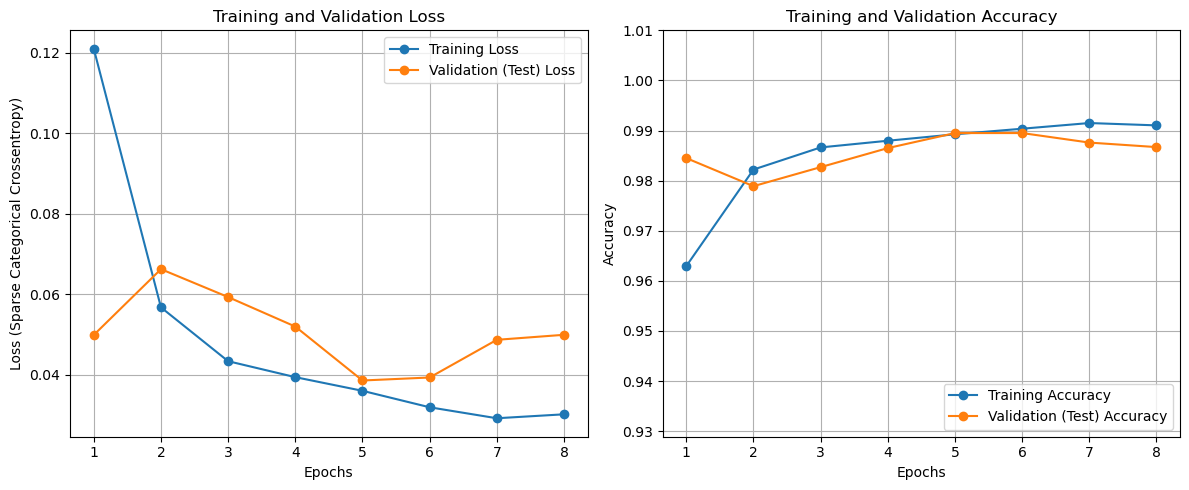

In [12]:
plot_history(history, CONFIG)

## Inferencing Sample 


--- Inference on Sample Images (TensorFlow) ---
Sample Digit: 0
  Predicted Label: 0
Sample Digit: 1
  Predicted Label: 1
Sample Digit: 2
  Predicted Label: 2
Sample Digit: 3
  Predicted Label: 3
Sample Digit: 4
  Predicted Label: 4
Sample Digit: 5
  Predicted Label: 5
Sample Digit: 6
  Predicted Label: 6
Sample Digit: 7
  Predicted Label: 7
Sample Digit: 8
  Predicted Label: 8
Sample Digit: 9
  Predicted Label: 9

Inference plot saved to mnist_inference_results_tf.png


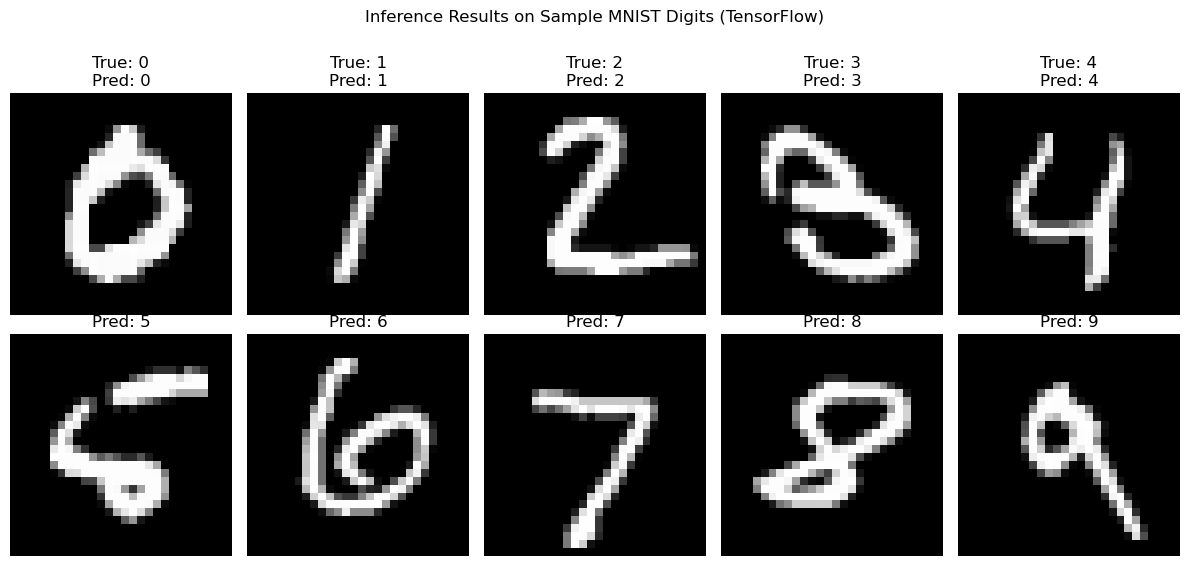

In [13]:
infer_tf(model, x_test, y_test)

## Saving Model

In [14]:
model.save("Model/cnn.keras")

## Loading Model and running inferencing

In [15]:
model = keras.models.load_model("Model/cnn.keras")

In [19]:
from inference import predict_digit

In [23]:
directory = 'test/'
allfiles = []
for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):
        allfiles.append("test/"+filename)

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 7
  Confidence: 13.62%


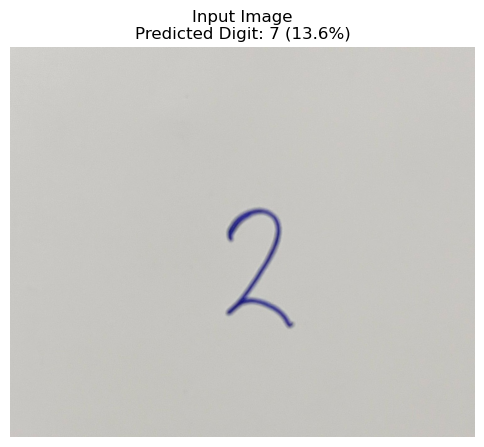

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 2
  Confidence: 70.56%


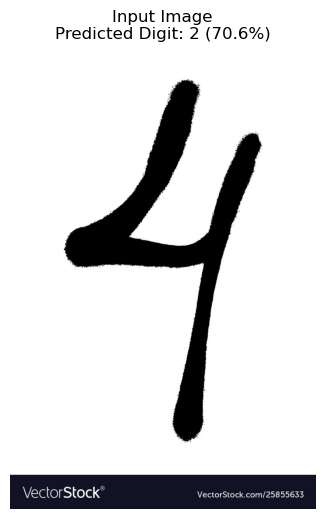

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 9
  Confidence: 14.01%


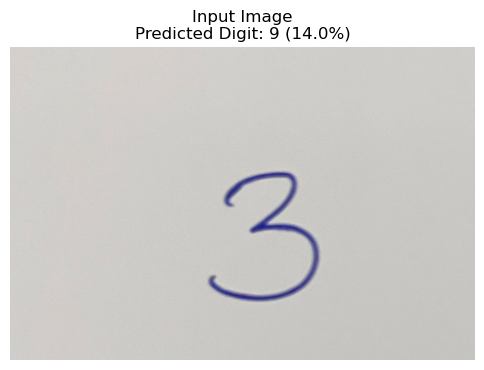

Error processing image: cannot identify image file 'test/number-small-2.svg'
Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 9
  Confidence: 24.82%


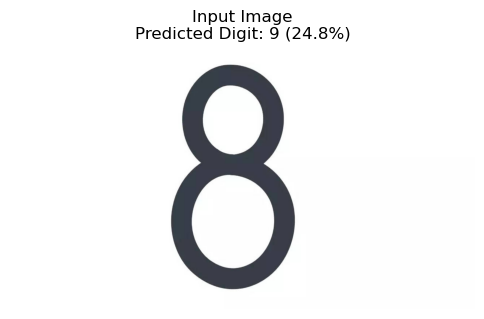

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 1
  Confidence: 98.87%


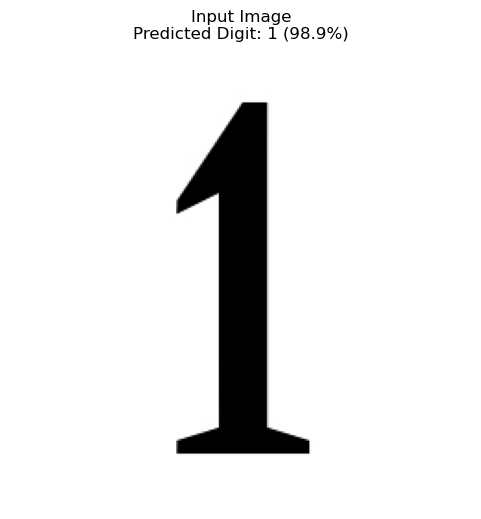

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 8
  Confidence: 13.51%


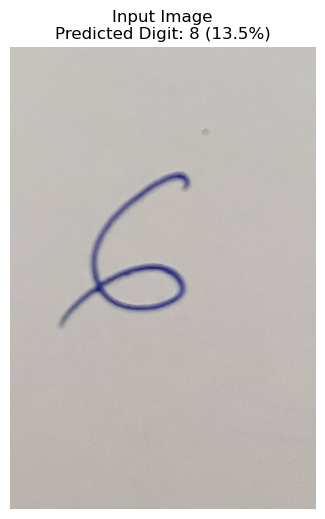

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 1
  Confidence: 14.55%


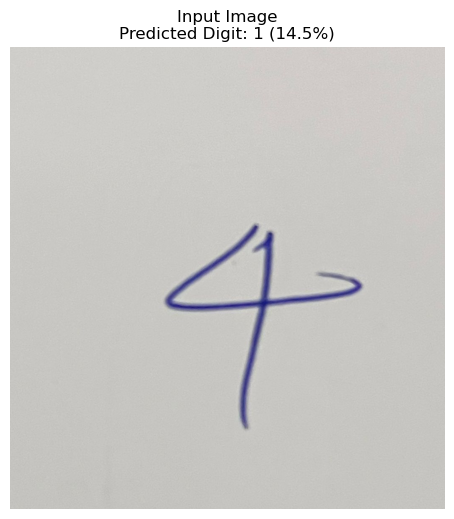

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 2
  Confidence: 86.99%


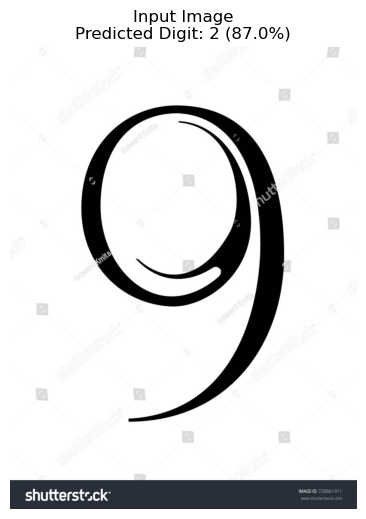

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 1
  Confidence: 14.33%


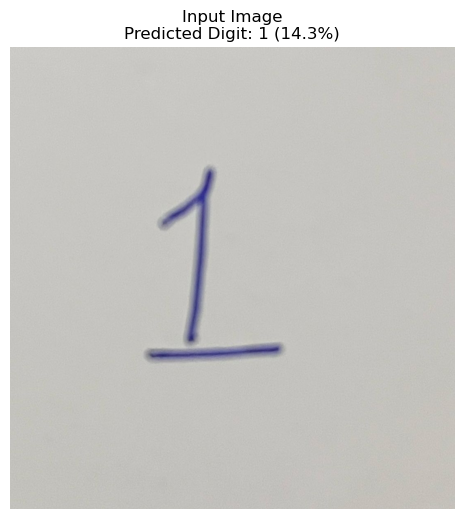

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 9
  Confidence: 14.92%


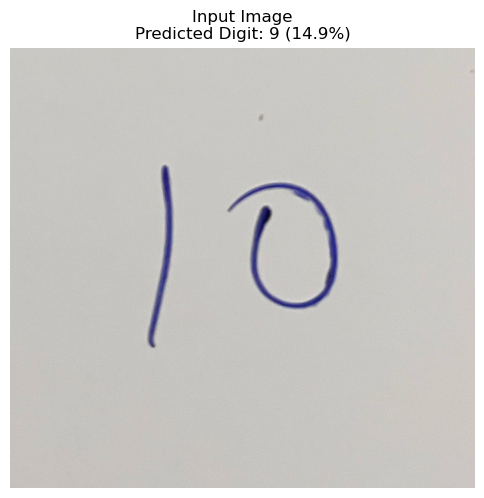

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 7
  Confidence: 15.12%


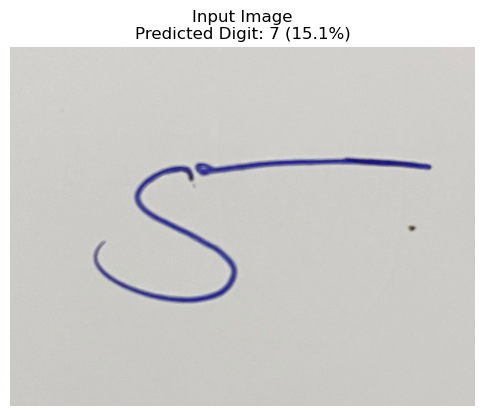

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 7
  Confidence: 14.70%


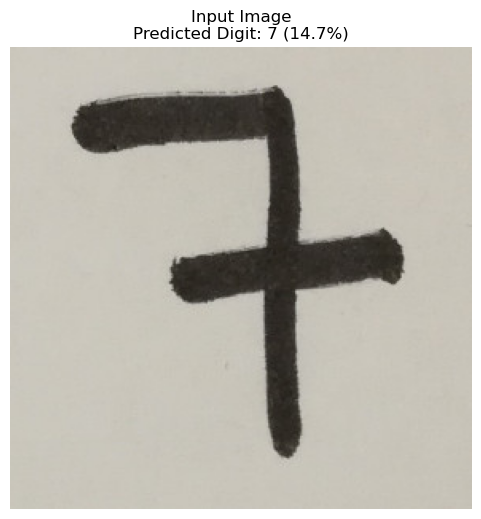

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 9
  Confidence: 15.38%


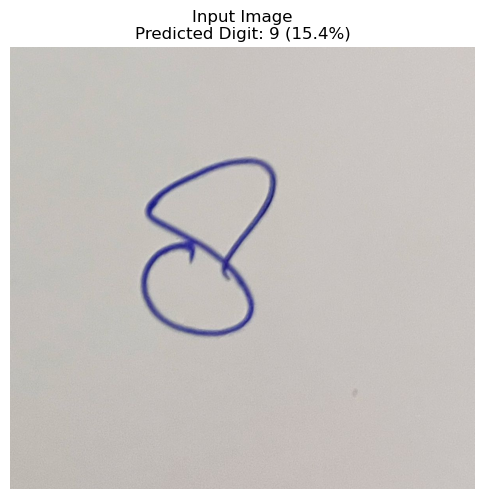

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 7
  Confidence: 98.02%


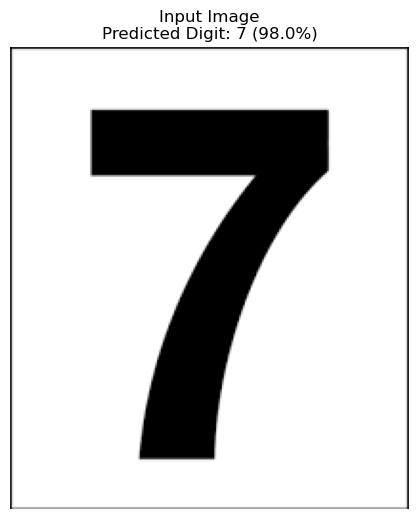

Detected light background, inverting image colors for model.
Image preprocessed successfully. Shape for model: (1, 28, 28, 1)
Performing prediction...

Prediction complete:
  Predicted Digit: 1
  Confidence: 13.49%


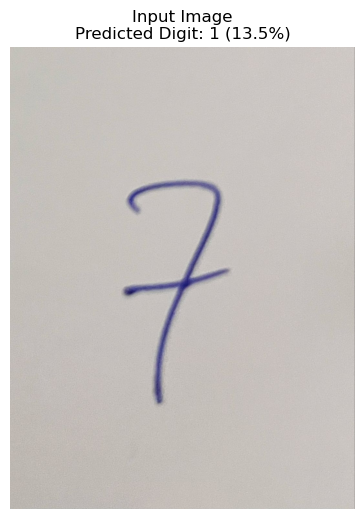

In [24]:
for i in allfiles:
    predict_digit(i , model)